<div style="width:100%;height:125px;text-align:center;border: 4px solid #206133;background-color:#206133;color:white">

<header  style="width:100%;height:100px;">
  <h1><b>Chapter 9.1</b></h1>
    <h4>LSTM with keras</h4>
</header>

<div>

# brief contents:

<div style="position: relative;height:100px;">
    
<div  style="width:300px;position:absolute;left: auto;border: 4px solid white;background-color:#02541B;color:white">
    <header></header>
    <a href="#data_s" style="padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Data Structure for Recurrent Neural Networks</b></h4>
      </a>
 </div>
    
 <div style="width:300px;position:absolute;left: 305px;border: 4px solid white;background-color:#02541B;color:whitee">
    <header></header>
    <a href="#Introduction"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Introduction to LSTM and GRU for Deep Learning</b></h4>
      </a>
     
  </div>
    <div style="width:300px;position:absolute;left: 610px;border: 4px solid white;background-color:#02541B;color:white">
    <header></header>
    <a href="#Simple"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Simple TensorFlow LSTM Example</b></h4>
      </a>
        </div>

    
   <div  style="width:300px;position:absolute;left: 915px;border: 4px solid white;background-color:#02541B;color:white">
    <header></header>
    <a href="#Sun"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>Sun Spots Exampl</b></h4>
      </a>
    </div>
  
    
   <div  style="width:300px;position:absolute;left: 1220px;border: 4px solid white;background-color:#02541B;color:white">
    <header></header>
    <a href="#model"style="position: relative;padding:5px;color:white;text-align: center;" href="#Chapter3">
      <h4 ><b>model for sun spots</b></h4>
      </a>
    </div>
</div>



<div id='data_s' style="width:100%;height:70px;border: 4px solid #206133;background-color:#206133;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Data Structure for Recurrent Neural Networks</b></h2></header>
</div>

<div style="border: 4px solid #BFE6FF;background-color:#BFE6FF;color:black;border-radius: 5px;padding:7px">
  <strong> Refrence: </strong><br>
    

</div>



Previously we trained neural networks with input ($x$) and expected output ($y$).  $X$ was a matrix, the rows were training examples and the columns were values to be predicted. The definition of $x$ will be expanded and y will stay the same.
Dimensions of training set ($x$):
* Axis 1: Training set elements (sequences) (must be of the same size as $y$ size)
* Axis 2: Members of sequence
* Axis 3: Features in data (like input neurons)
Previously, we might take as input a single stock price, to predict if we should buy (1), sell (-1), or hold (0).

In [1]:
x = [
    [32],
    [41],
    [39],
    [20],
    [15]
]

y = [
    1,
    -1,
    0,
    -1,
    1
]

print(x)
print(y)

[[32], [41], [39], [20], [15]]
[1, -1, 0, -1, 1]


In [2]:
from IPython.display import display, HTML
import pandas as pd
import numpy as np

x = np.array(x)
print(x[:,0])


df = pd.DataFrame({'x':x[:,0], 'y':y})
display(df)

[32 41 39 20 15]


,x,y
0,32,1
1,41,-1
2,39,0
3,20,-1
4,15,1


In [3]:
x = [
    [[32,1383],[41,2928],[39,8823],[20,1252],[15,1532]],
    [[35,8272],[32,1383],[41,2928],[39,8823],[20,1252]],
    [[37,2738],[35,8272],[32,1383],[41,2928],[39,8823]],
    [[34,2845],[37,2738],[35,8272],[32,1383],[41,2928]],
    [[32,2345],[34,2845],[37,2738],[35,8272],[32,1383]],
]

y = [
    1,
    -1,
    0,
    -1,
    1
]

print(x)
print(y)

[[[32, 1383], [41, 2928], [39, 8823], [20, 1252], [15, 1532]], [[35, 8272], [32, 1383], [41, 2928], [39, 8823], [20, 1252]], [[37, 2738], [35, 8272], [32, 1383], [41, 2928], [39, 8823]], [[34, 2845], [37, 2738], [35, 8272], [32, 1383], [41, 2928]], [[32, 2345], [34, 2845], [37, 2738], [35, 8272], [32, 1383]]]
[1, -1, 0, -1, 1]


In [4]:
x = [
    [[32],[41],[39],[20],[15]],
    [[35],[32],[41],[39],[20]],
    [[37],[35],[32],[41],[39]],
    [[34],[37],[35],[32],[41]],
    [[32],[34],[37],[35],[32]],
]

y = [
    1,
    -1,
    0,
    -1,
    1
]

print(x)
print(y)

[[[32], [41], [39], [20], [15]], [[35], [32], [41], [39], [20]], [[37], [35], [32], [41], [39]], [[34], [37], [35], [32], [41]], [[32], [34], [37], [35], [32]]]
[1, -1, 0, -1, 1]


Sigmoid


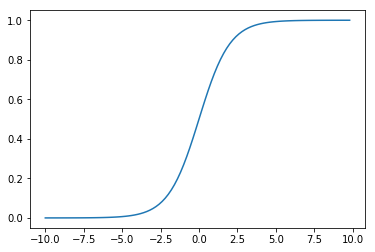

Hyperbolic Tangent(tanh)


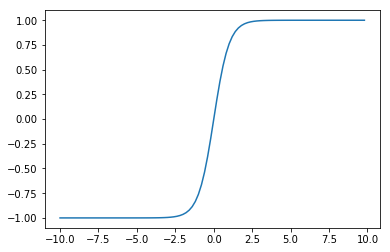

In [5]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a

def f2(x):
    a = []
    for item in x:
        a.append(math.tanh(item))
    return a

x = np.arange(-10., 10., 0.2)
y1 = sigmoid(x)
y2 = f2(x)

print("Sigmoid")
plt.plot(x,y1)
plt.show()

print("Hyperbolic Tangent(tanh)")
plt.plot(x,y2)
plt.show()

<div id='Introduction' style="width:100%;height:70px;border: 4px solid #206133;background-color:#206133;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Introduction to LSTM and GRU for Deep Learning</b></h2></header>
</div>

<img     style='width:400px;'
    src='https://camo.githubusercontent.com/833a6504b300950efc764d52dabb10d232491404/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f31305f6c73746d312e706e67'>
    
<img     style='width:400px;'
    src='https://camo.githubusercontent.com/17bb4659628de279abae38f783f2555c399f1590/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f6a656666686561746f6e2f7438315f3535385f646565705f6c6561726e696e672f6d61737465722f696d616765732f636c6173735f31305f6c73746d322e706e67'>

<div id='Simple' style="width:100%;height:70px;border: 4px solid #206133;background-color:#206133;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Simple TensorFlow LSTM Example</b></h2></header>
</div>

In [6]:
x = [
    [[0],[1],[1],[0],[0],[0]],
    [[0],[0],[0],[2],[2],[0]],
    [[0],[0],[0],[0],[3],[3]],
    [[0],[2],[2],[0],[0],[0]],
    [[0],[0],[3],[3],[0],[0]],
    [[0],[0],[0],[0],[1],[1]]
]
x = np.array(x,dtype=np.float32)
y = np.array([1,2,3,2,3,1],dtype=np.int32)

In [12]:
# Convert y2 to dummy variables
max_features = 4 
y2 = np.zeros((y.shape[0], max_features),dtype=np.float32)
y2[np.arange(y.shape[0]), y] = 1.0
print(y2)

[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]


In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.losses import categorical_crossentropy

from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
def model_LSTM():
    model = Sequential()
    
    model.add(LSTM(128,dropout=0.2,recurrent_dropout=0.2, input_shape=(None,1)))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(4, activation='sigmoid'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    return model

In [21]:
model = model_LSTM()

model.fit(x,y2, epochs=200, verbose=0)
pred = model.predict(x)
predict_classes = np.argmax(pred,axis=1)
print("Predicted classes: ",predict_classes)
print("Expected classes: ",predict_classes)

Predicted classes:  [1 2 3 2 3 1]
Expected classes:  [1 2 3 2 3 1]


<div id='Sun' style="width:100%;height:70px;border: 4px solid #206133;background-color:#206133;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>Sun Spots Example</b></h2></header>
</div>

An example of RNN regression to predict sunspots. The data files needed for this example can be found at the following location:<br>
- [Sunspot Data Files](http://www.sidc.be/silso/datafiles#total)
- [Download](http://www.sidc.be/silso/INFO/sndtotcsv.php)

In [25]:
import pandas as pd
names = ['year', 'month', 'day', 'dec_year', 'sn_value' , 'sn_error', 'obs_num']
df = pd.read_csv('data/SN_d_tot_V2.0.csv',sep=';',header=None, names= names, na_values=['NA','?','-1'],index_col=False)
df.tail(3)


,year,month,day,dec_year,sn_value,sn_error,obs_num
73411,2018,12,29,2018.993,0,0.0,21
73412,2018,12,30,2018.996,0,0.0,20
73413,2018,12,31,2018.999,0,0.0,4


In [26]:
start_id = max(df[df['obs_num'] == 0].index.tolist())+1  # Find the last zero and move one beyond
print(start_id)
df = df[start_id:] # Trim the rows that have missing observations

11314


In [30]:
df.head(12)

,year,month,day,dec_year,sn_value,sn_error,obs_num
11314,1848,12,23,1848.977,353,23.8,1
11315,1848,12,24,1848.980,240,19.6,1
11316,1848,12,25,1848.982,275,21.0,1
11317,1848,12,26,1848.985,352,23.8,1
11318,1848,12,27,1848.988,268,20.8,1
11319,1848,12,28,1848.990,285,21.4,1
11320,1848,12,29,1848.993,343,23.5,1
11321,1848,12,30,1848.996,340,23.4,1
11322,1848,12,31,1848.999,238,19.6,1
11323,1849,1,1,1849.001,287,20.9,1


In [12]:
df_train = df[df['year']<2000]
df_test = df[df['year']>=2000]

spots_train = df_train['sn_value'].tolist()
spots_test = df_test['sn_value'].tolist()

print("Training set has {} observations.".format(len(spots_train)))
print("Test set has {} observations.".format(len(spots_test)))


Training set has 55160 observations.
Test set has 6940 observations.


In [21]:
spots_train[0:10]

[353, 240, 275, 352, 268, 285, 343, 340, 238, 287]

In [4]:
from farhad_DL.utility import to_sequences

In [5]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,spots_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,spots_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))


Shape of training set: (55149, 10, 1)
Shape of test set: (6929, 10, 1)


In [29]:
x_train[1]

array([[240],
       [275],
       [352],
       [268],
       [285],
       [343],
       [340],
       [238],
       [287],
       [294]])

In [24]:
y_train

array([294, 342, 287, ...,  85, 103,  66])

<div id='model' style="width:100%;height:70px;border: 4px solid #206133;background-color:#206133;color:white;text-align:center;border-radius: 25px;padding:3px">
  <header><h2><b>model for sun spots</b></h2></header>
</div>

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

from  tensorflow.keras.callbacks import EarlyStopping
#from tensorflow.keras import losses.mean_squared_error

import numpy as np
from sklearn.metrics import mean_squared_error
from farhad_DL.

In [53]:
def model_sunspots():
    model = Sequential()
    
    model.add(LSTM(64, dropout=0.0, recurrent_dropout=0.0, input_shape=(None,1)))
    model.add(Dense(1, activation='relu'))
    
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    
    return model

In [55]:
def run_model(epochs=100,batch_size=40):
    model = model_sunspots()
    monitor = EarlyStopping( monitor='val_loss', mode='auto',verbose=0)
    model.fit(x_train,y_train, validation_data=(x_test,y_test), verbose=0, callbacks=[monitor], epochs=epochs, batch_size=batch_size)
    
    pred = model.predict(x_test)
    score = np.sqrt(mean_squared_error(pred,y_test))
    print("Score (RMSE): {}".format(score))
    
    return score

In [56]:
run_model(1000)

Score (RMSE): 22.576051852390925


22.576051852390925

<div id="layers" style="width:100%;height:70px;border: 4px solid #179871;background-color:#179871;color:white;text-align:center;border-radius: 25px;padding:3px">
    <h1>+PLus Theory<h1></div>

In [ ]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)

# LSTM

In [ ]:
keras.layers.LSTM(units, 
                  #activation='tanh', 
                  recurrent_activation='hard_sigmoid', 
                  use_bias=True, 
                  kernel_initializer='glorot_uniform', 
                  recurrent_initializer='orthogonal', 
                  bias_initializer='zeros', 
                  unit_forget_bias=True, 
                  kernel_regularizer=None, 
                  recurrent_regularizer=None, 
                  bias_regularizer=None, 
                  activity_regularizer=None, 
                  kernel_constraint=None, 
                  recurrent_constraint=None, 
                  bias_constraint=None, 
                  dropout=0.0, 
                  recurrent_dropout=0.0, 
                  implementation=1, 
                  return_sequences=False, 
                  return_state=False, 
                  go_backwards=False, 
                  stateful=False, 
                  unroll=False)

- <b>recurrent_activation:</b> Activation function to use for the recurrent step. Default: hard sigmoid (hard_sigmoid). If you pass None, no activation is applied (ie. "linear" activation: a(x) = x).
- <b>use_bias:</b> Boolean, whether the layer uses a bias vector.

- <b>kernel_initializer:</b> Initializer for the kernel weights matrix, used for the linear transformation of the inputs. (Initializations define the way to set the initial random weights of Keras layers.)[see initializers page](https://keras.io/initializers/)
- <b>recurrent_initializer:</b> Initializer for the recurrent_kernel weights matrix, used for the linear transformation of the recurrent state. 
- <b>bias_initializer:</b> Initializer for the bias vector.

- <b>unit_forget_bias:</b> Boolean. If True, add 1 to the bias of the forget gate at initialization. Setting it to true will also force bias_initializer="zeros".

- <b>kernel_regularizer:</b> Regularizer function applied to the kernel weights matrix.
- <b>recurrent_regularizer:</b> Regularizer function applied to the recurrent_kernel weights matrix.(Regularizers allow to apply penalties on layer parameters or layer activity during optimization. These penalties are incorporated in the loss function that the network optimizes.)
- <b>bias_regularizer:</b> Regularizer function applied to the bias vector.
- <b>activity_regularizer:</b> Regularizer function applied to the output of the layer (its "activation"). 

- <font color='#5E0011'><b>dropout:</b> Float between 0 and 1. Fraction of the units to drop for the linear transformation of the inputs.</font>
- <font color='#5E0011'><b>recurrent_dropout:</b> Float between 0 and 1. Fraction of the units to drop for the linear transformation of the recurrent state.</font>

- <b>implementation:</b> Implementation mode, either 1 or 2. Mode 1 will structure its operations as a larger number of smaller dot products and additions, whereas mode 2 will batch them into fewer, larger operations. These modes will have different performance profiles on different hardware and for different applications.
- <b>return_sequences:</b> Boolean. Whether to return the last output in the output sequence, or the full sequence.
- <b>return_state:</b> Boolean. Whether to return the last state in addition to the output. The returned elements of the states list are the hidden state and the cell state, respectively.
- <b>go_backwards:</b> Boolean (default False). If True, process the input sequence backwards and return the reversed sequence.
- <b>stateful:</b> Boolean (default False). If True, the last state for each sample at index i in a batch will be used as initial state for the sample of index i in the following batch.
- <b>unroll:</b> Boolean (default False). If True, the network will be unrolled, else a symbolic loop will be used. Unrolling can speed-up a RNN, although it tends to be more memory-intensive. Unrolling is only suitable for short sequences.